In [36]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [37]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 10

In [38]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato", shuffle=True, image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [39]:
CLASS_NAME = dataset.class_names
CLASS_NAME

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 0 0 0 2 2 1 0 0 2 0 0 1 0 1 1 1 1 2 0 1 1 0 1 2 0 1 1 0 0 1 0]


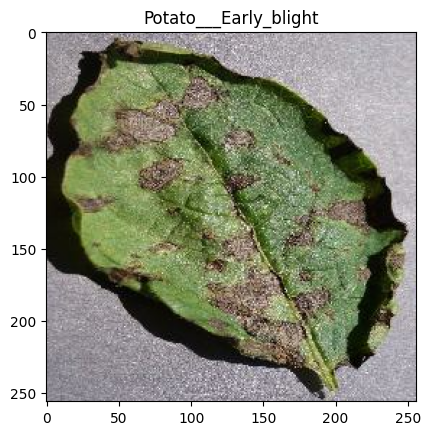

In [40]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(CLASS_NAME[label_batch[0]])
    print(label_batch.numpy())

In [41]:
def get_dataset_partitions(ds, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffleSize=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffleSize, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [42]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)
print(len(train_ds),
len(test_ds),
len(val_ds),)

54 8 6


In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [44]:
resizeAndRescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
dataAugmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)

])

In [45]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS,)
n_classes =3
model = models.Sequential([
    resizeAndRescale,
    dataAugmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [48]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data=val_ds
)

Epoch 1/10


54/54 [==============================] - 112s 2s/step - loss: 0.6877 - accuracy: 0.6933 - val_loss: 0.6682 - val_accuracy: 0.7500
Epoch 2/10
54/54 [==============================] - 111s 2s/step - loss: 0.3963 - accuracy: 0.8466 - val_loss: 0.4407 - val_accuracy: 0.7969
Epoch 3/10
54/54 [==============================] - 107s 2s/step - loss: 0.2765 - accuracy: 0.8889 - val_loss: 0.2508 - val_accuracy: 0.8854
Epoch 4/10
45/54 [========================>.....] - ETA: 16s - loss: 0.2476 - accuracy: 0.9139

KeyboardInterrupt: 

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 349ms/step - loss: 0.5605 - accuracy: 0.8438


In [ ]:
scores

[0.5605316162109375, 0.84375]

In [ ]:
history.params

{'verbose': 1, 'epochs': 1, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Loss')

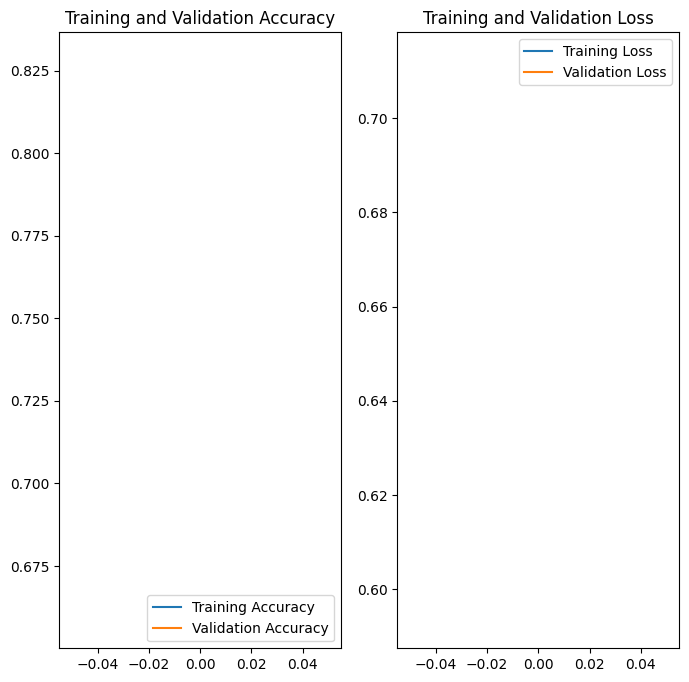

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

first image to predict
actual label:  Potato___Early_blight
1/1 [==============================] - 1s 651ms/step
Predicted label:  Potato___Early_blight


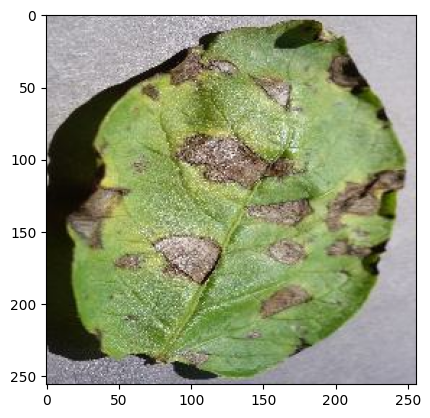

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[1].numpy().astype(("uint8"))
    first_label = labels_batch[1].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: ",CLASS_NAME[first_label])
    batch_prediction = model.predict(image_batch)
    print("Predicted label: ",CLASS_NAME[np.argmax(batch_prediction[1])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = CLASS_NAME[np.argmax(predictions[0])]
    confidence= round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


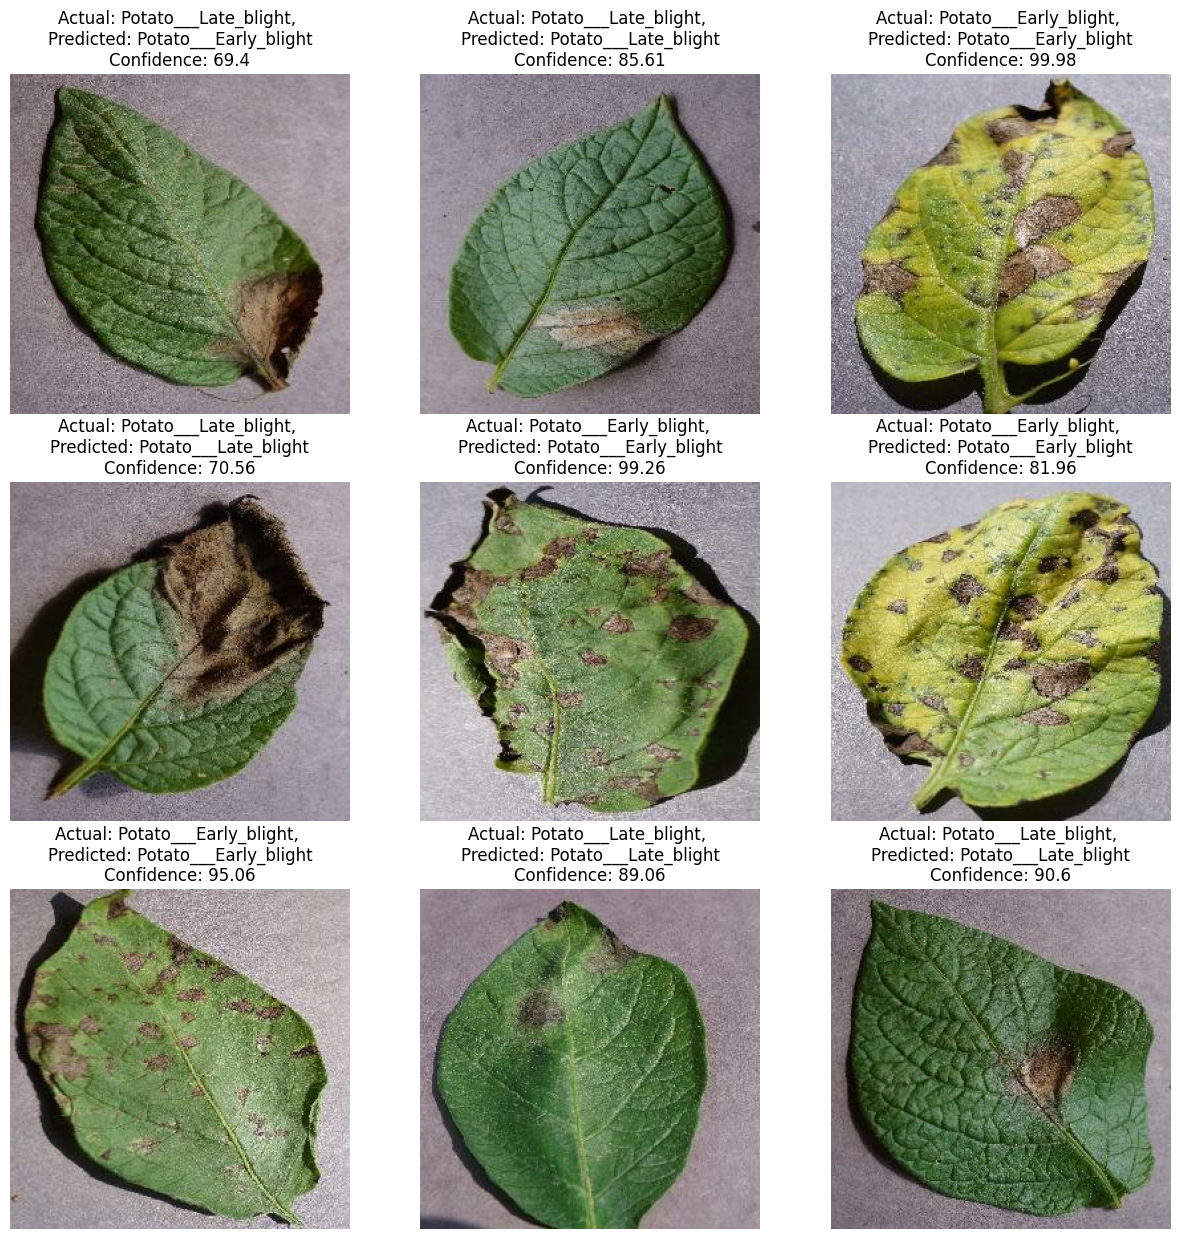

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = CLASS_NAME[labels[i]]
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}\nConfidence: {confidence}")
        plt.axis("off")

In [ ]:
model_version = 3
model.save(f"./models/modelV{model_version}.keras")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  